In [1]:
from PIL import Image
from io import BytesIO
from boto3 import client
import boto3
import time
import random
import json
import os
import pandas as pd
import random

from image_process_tools import *

import requests as req
import numpy as np
import gist
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.metrics.pairwise import cosine_distances
from sklearn.metrics import silhouette_score
from sklearn.metrics.pairwise import distance_metrics
from sklearn.metrics.pairwise import pairwise_distances
from sklearn import metrics
import cv2


In [2]:
%load_ext autoreload

%autoreload 2

In [3]:
area = 'Seattle-Washington-US/'
bucket_name = "chen-gal-test"
imagepath = "https://s3-us-west-2.amazonaws.com/chen-gal-test/AirbnbImages/"+area
imagepath

'https://s3-us-west-2.amazonaws.com/chen-gal-test/AirbnbImages/Seattle-Washington-US/'

In [4]:
prefix = "AirbnbImages/"+area
s3 = boto3.resource('s3')
bucket = s3.Bucket(name=bucket_name)
images_valid = list(bucket.objects.filter(Prefix=prefix))

In [5]:
filenames = []
apt_list = []
full_filenames = []
counter = 0
featureX = np.zeros((1,960))
counter = 0

In [6]:
logfile_name = '../Logs/gist_feature_extraction_Seattle-Washington-US.txt'

feature_folder = '../'+'features/'+ area + 'gist/'
if not os.path.exists(feature_folder):
    os.makedirs(feature_folder)

In [11]:
response = req.get(full_path_name)
img_temp = Image.open(BytesIO(response.content))
im = np.asarray(img_temp.resize((600,400)))
feature_tmp = gist.extract(im)



In [9]:
for obj in images_valid[1:]:
    if counter % 150 == 0 or counter < 10:
        print("Processing image {} of {}\n ,{}..................".format(counter,len(images_valid),obj.key))
    string = obj.key.split('/')  
    try:
        full_path_name = 'https://s3-us-west-2.amazonaws.com/'\
                                +bucket_name+'/'+ str(obj.key)         
        response = req.get(full_path_name)
        img_temp = Image.open(BytesIO(response.content))
        im = np.asarray(img_temp.resize((600,400)))
        feature_tmp = gist.extract(im)
        
    except:
        print('!!!!!!!!!!!!Error at img {}'.format(obj.key))
        with open(logfile_name,'a') as f:
            f.write('!!!!!!Failed at image {} ||{}\n'.format(counter,full_path_name) )       
        continue
    else:
        counter += 1
        full_filenames.append(full_path_name)
        apt_list.append(string[-1].split('_')[-2])
        filenames.append(string[-1])
        featureX = np.concatenate((featureX,feature_tmp.reshape(1,-1)),axis = 0)
        
        with open(logfile_name,'a') as f:
            f.write('---------------------\n \
                            successfully extracted the feature of image {} ||{}'.format(counter,full_path_name) )
    if counter % 5000 == 0:
        columns1 = list(range(featureX.shape[1]))
        df_return = pd.DataFrame(featureX[1:,:],columns = columns1)
        
        df_return['apt'] = apt_list
        df_return['full_filename'] = full_filenames
        df_return['filename'] = filenames

        filename = feature_folder + 'featureture_'+str(counter)+'.pickle'
        df_return.to_pickle(filename)
        filenames,apt_list,full_filenames = [],[],[]
        featureX = np.zeros((1,960))
             
            
    
columns1 = list(range(featureX.shape[1]))
df_return = pd.DataFrame(featureX[1:,:],columns = columns1)

df_return['apt'] = apt_list
df_return['full_filename'] = full_filenames
df_return['filename'] = filenames
filename = feature_folder + 'featureure_'+str(counter)+'.pickle'
df_return.to_pickle(filename)

Processing image 0 of 138821
 ,AirbnbImages/Seattle-Washington-US/10015748_0.jpg..................
Processing image 1 of 138821
 ,AirbnbImages/Seattle-Washington-US/10015748_1.jpg..................
Processing image 2 of 138821
 ,AirbnbImages/Seattle-Washington-US/10018565_0.jpg..................
Processing image 3 of 138821
 ,AirbnbImages/Seattle-Washington-US/10018565_1.jpg..................
Processing image 4 of 138821
 ,AirbnbImages/Seattle-Washington-US/10018565_10.jpg..................
Processing image 5 of 138821
 ,AirbnbImages/Seattle-Washington-US/10018565_11.jpg..................
Processing image 6 of 138821
 ,AirbnbImages/Seattle-Washington-US/10018565_12.jpg..................
Processing image 7 of 138821
 ,AirbnbImages/Seattle-Washington-US/10018565_13.jpg..................
Processing image 8 of 138821
 ,AirbnbImages/Seattle-Washington-US/10018565_14.jpg..................
Processing image 9 of 138821
 ,AirbnbImages/Seattle-Washington-US/10018565_15.jpg..................
Proc

Processing image 10950 of 138821
 ,AirbnbImages/Seattle-Washington-US/11723543_10.jpg..................
!!!!!!!!!!!!Error at img AirbnbImages/Seattle-Washington-US/11738926_26.jpg
Processing image 11100 of 138821
 ,AirbnbImages/Seattle-Washington-US/11756531_4.jpg..................
Processing image 11250 of 138821
 ,AirbnbImages/Seattle-Washington-US/11773631_9.jpg..................
Processing image 11400 of 138821
 ,AirbnbImages/Seattle-Washington-US/11802204_20.jpg..................
Processing image 11550 of 138821
 ,AirbnbImages/Seattle-Washington-US/11824878_6.jpg..................
Processing image 11700 of 138821
 ,AirbnbImages/Seattle-Washington-US/11844588_9.jpg..................
Processing image 11850 of 138821
 ,AirbnbImages/Seattle-Washington-US/11851511_22.jpg..................
Processing image 12000 of 138821
 ,AirbnbImages/Seattle-Washington-US/11868984_15.jpg..................
Processing image 12150 of 138821
 ,AirbnbImages/Seattle-Washington-US/11874668_33.jpg...........

Processing image 22800 of 138821
 ,AirbnbImages/Seattle-Washington-US/13098348_14.jpg..................
Processing image 22950 of 138821
 ,AirbnbImages/Seattle-Washington-US/13114164_4.jpg..................
Processing image 23100 of 138821
 ,AirbnbImages/Seattle-Washington-US/13135771_4.jpg..................
Processing image 23250 of 138821
 ,AirbnbImages/Seattle-Washington-US/13154696_40.jpg..................
Processing image 23400 of 138821
 ,AirbnbImages/Seattle-Washington-US/13175298_18.jpg..................
Processing image 23550 of 138821
 ,AirbnbImages/Seattle-Washington-US/13191862_4.jpg..................
Processing image 23700 of 138821
 ,AirbnbImages/Seattle-Washington-US/13208974_5.jpg..................
Processing image 23850 of 138821
 ,AirbnbImages/Seattle-Washington-US/13222856_41.jpg..................
Processing image 24000 of 138821
 ,AirbnbImages/Seattle-Washington-US/13238217_3.jpg..................
Processing image 24150 of 138821
 ,AirbnbImages/Seattle-Washington-US

Processing image 34500 of 138821
 ,AirbnbImages/Seattle-Washington-US/14188561_26.jpg..................
Processing image 34650 of 138821
 ,AirbnbImages/Seattle-Washington-US/14210964_18.jpg..................
Processing image 34800 of 138821
 ,AirbnbImages/Seattle-Washington-US/1421641_16.jpg..................
Processing image 34950 of 138821
 ,AirbnbImages/Seattle-Washington-US/14222699_5.jpg..................
Processing image 35100 of 138821
 ,AirbnbImages/Seattle-Washington-US/14254258_0.jpg..................
!!!!!!!!!!!!Error at img AirbnbImages/Seattle-Washington-US/1428014_1.jpg
Processing image 35250 of 138821
 ,AirbnbImages/Seattle-Washington-US/1428014_2.jpg..................
Processing image 35400 of 138821
 ,AirbnbImages/Seattle-Washington-US/14300168_23.jpg..................
!!!!!!!!!!!!Error at img AirbnbImages/Seattle-Washington-US/14300866_5.jpg
Processing image 35550 of 138821
 ,AirbnbImages/Seattle-Washington-US/14302558_9.jpg..................
Processing image 35700 of

Processing image 46050 of 138821
 ,AirbnbImages/Seattle-Washington-US/15479066_6.jpg..................
Processing image 46200 of 138821
 ,AirbnbImages/Seattle-Washington-US/15501084_4.jpg..................
Processing image 46350 of 138821
 ,AirbnbImages/Seattle-Washington-US/15522011_0.jpg..................
Processing image 46500 of 138821
 ,AirbnbImages/Seattle-Washington-US/15534697_9.jpg..................
Processing image 46650 of 138821
 ,AirbnbImages/Seattle-Washington-US/15554221_19.jpg..................
Processing image 46800 of 138821
 ,AirbnbImages/Seattle-Washington-US/1557529_2.jpg..................
Processing image 46950 of 138821
 ,AirbnbImages/Seattle-Washington-US/1559858_0.jpg..................
Processing image 47100 of 138821
 ,AirbnbImages/Seattle-Washington-US/15603933_6.jpg..................
Processing image 47250 of 138821
 ,AirbnbImages/Seattle-Washington-US/15611908_7.jpg..................
Processing image 47400 of 138821
 ,AirbnbImages/Seattle-Washington-US/1563

Processing image 57750 of 138821
 ,AirbnbImages/Seattle-Washington-US/16769181_2.jpg..................
Processing image 57900 of 138821
 ,AirbnbImages/Seattle-Washington-US/1677426_96.jpg..................
Processing image 58050 of 138821
 ,AirbnbImages/Seattle-Washington-US/16791611_12.jpg..................
Processing image 58200 of 138821
 ,AirbnbImages/Seattle-Washington-US/16805883_1.jpg..................
Processing image 58350 of 138821
 ,AirbnbImages/Seattle-Washington-US/16814616_10.jpg..................
Processing image 58500 of 138821
 ,AirbnbImages/Seattle-Washington-US/16830306_0.jpg..................
Processing image 58650 of 138821
 ,AirbnbImages/Seattle-Washington-US/16858293_3.jpg..................
Processing image 58800 of 138821
 ,AirbnbImages/Seattle-Washington-US/16873922_11.jpg..................
Processing image 58950 of 138821
 ,AirbnbImages/Seattle-Washington-US/16885425_3.jpg..................
Processing image 59100 of 138821
 ,AirbnbImages/Seattle-Washington-US/

Processing image 69600 of 138821
 ,AirbnbImages/Seattle-Washington-US/18043036_13.jpg..................
Processing image 69750 of 138821
 ,AirbnbImages/Seattle-Washington-US/18059853_4.jpg..................
Processing image 69900 of 138821
 ,AirbnbImages/Seattle-Washington-US/18077238_1.jpg..................
Processing image 70050 of 138821
 ,AirbnbImages/Seattle-Washington-US/18077909_6.jpg..................
Processing image 70200 of 138821
 ,AirbnbImages/Seattle-Washington-US/18095400_10.jpg..................
Processing image 70350 of 138821
 ,AirbnbImages/Seattle-Washington-US/1810751_66.jpg..................
Processing image 70500 of 138821
 ,AirbnbImages/Seattle-Washington-US/18124200_18.jpg..................
Processing image 70650 of 138821
 ,AirbnbImages/Seattle-Washington-US/18138617_2.jpg..................
Processing image 70800 of 138821
 ,AirbnbImages/Seattle-Washington-US/18152625_11.jpg..................
Processing image 70950 of 138821
 ,AirbnbImages/Seattle-Washington-US

Processing image 81300 of 138821
 ,AirbnbImages/Seattle-Washington-US/2784865_10.jpg..................
Processing image 81450 of 138821
 ,AirbnbImages/Seattle-Washington-US/2818169_6.jpg..................
Processing image 81600 of 138821
 ,AirbnbImages/Seattle-Washington-US/2838091_25.jpg..................
Processing image 81750 of 138821
 ,AirbnbImages/Seattle-Washington-US/2854618_2.jpg..................
Processing image 81900 of 138821
 ,AirbnbImages/Seattle-Washington-US/2864984_15.jpg..................
Processing image 82050 of 138821
 ,AirbnbImages/Seattle-Washington-US/2875937_17.jpg..................
Processing image 82200 of 138821
 ,AirbnbImages/Seattle-Washington-US/2889528_4.jpg..................
Processing image 82350 of 138821
 ,AirbnbImages/Seattle-Washington-US/2915375_37.jpg..................
Processing image 82500 of 138821
 ,AirbnbImages/Seattle-Washington-US/2933879_20.jpg..................
Processing image 82650 of 138821
 ,AirbnbImages/Seattle-Washington-US/294345

Processing image 93150 of 138821
 ,AirbnbImages/Seattle-Washington-US/4191637_5.jpg..................
Processing image 93300 of 138821
 ,AirbnbImages/Seattle-Washington-US/4210400_10.jpg..................
Processing image 93450 of 138821
 ,AirbnbImages/Seattle-Washington-US/4251471_17.jpg..................
Processing image 93600 of 138821
 ,AirbnbImages/Seattle-Washington-US/4258959_29.jpg..................
Processing image 93750 of 138821
 ,AirbnbImages/Seattle-Washington-US/4271029_22.jpg..................
Processing image 93900 of 138821
 ,AirbnbImages/Seattle-Washington-US/4284953_61.jpg..................
Processing image 94050 of 138821
 ,AirbnbImages/Seattle-Washington-US/431558_15.jpg..................
Processing image 94200 of 138821
 ,AirbnbImages/Seattle-Washington-US/4334799_15.jpg..................
!!!!!!!!!!!!Error at img AirbnbImages/Seattle-Washington-US/4339442_1.jpg
Processing image 94350 of 138821
 ,AirbnbImages/Seattle-Washington-US/4343967_12.jpg..................
P

Processing image 105000 of 138821
 ,AirbnbImages/Seattle-Washington-US/5640969_21.jpg..................
Processing image 105150 of 138821
 ,AirbnbImages/Seattle-Washington-US/5652903_2.jpg..................
Processing image 105300 of 138821
 ,AirbnbImages/Seattle-Washington-US/566195_8.jpg..................
Processing image 105450 of 138821
 ,AirbnbImages/Seattle-Washington-US/5680126_4.jpg..................
Processing image 105600 of 138821
 ,AirbnbImages/Seattle-Washington-US/5705605_15.jpg..................
Processing image 105750 of 138821
 ,AirbnbImages/Seattle-Washington-US/573010_17.jpg..................
Processing image 105900 of 138821
 ,AirbnbImages/Seattle-Washington-US/5749306_17.jpg..................
Processing image 106050 of 138821
 ,AirbnbImages/Seattle-Washington-US/5760160_13.jpg..................
Processing image 106200 of 138821
 ,AirbnbImages/Seattle-Washington-US/5786506_4.jpg..................
Processing image 106350 of 138821
 ,AirbnbImages/Seattle-Washington-US

Processing image 116700 of 138821
 ,AirbnbImages/Seattle-Washington-US/7032225_31.jpg..................
Processing image 116850 of 138821
 ,AirbnbImages/Seattle-Washington-US/7035169_10.jpg..................
Processing image 117000 of 138821
 ,AirbnbImages/Seattle-Washington-US/7053933_17.jpg..................
Processing image 117150 of 138821
 ,AirbnbImages/Seattle-Washington-US/7086506_3.jpg..................
Processing image 117300 of 138821
 ,AirbnbImages/Seattle-Washington-US/7115022_12.jpg..................
Processing image 117450 of 138821
 ,AirbnbImages/Seattle-Washington-US/7119361_1.jpg..................
Processing image 117600 of 138821
 ,AirbnbImages/Seattle-Washington-US/7149655_11.jpg..................
Processing image 117750 of 138821
 ,AirbnbImages/Seattle-Washington-US/7179922_12.jpg..................
Processing image 117900 of 138821
 ,AirbnbImages/Seattle-Washington-US/72186_38.jpg..................
Processing image 118050 of 138821
 ,AirbnbImages/Seattle-Washington-

Processing image 128700 of 138821
 ,AirbnbImages/Seattle-Washington-US/8698315_5.jpg..................
Processing image 128850 of 138821
 ,AirbnbImages/Seattle-Washington-US/8719904_10.jpg..................
Processing image 129000 of 138821
 ,AirbnbImages/Seattle-Washington-US/8733084_13.jpg..................
Processing image 129150 of 138821
 ,AirbnbImages/Seattle-Washington-US/8754021_7.jpg..................
Processing image 129300 of 138821
 ,AirbnbImages/Seattle-Washington-US/8798749_4.jpg..................
Processing image 129450 of 138821
 ,AirbnbImages/Seattle-Washington-US/8842362_14.jpg..................
Processing image 129600 of 138821
 ,AirbnbImages/Seattle-Washington-US/8864713_7.jpg..................
Processing image 129750 of 138821
 ,AirbnbImages/Seattle-Washington-US/8881728_2.jpg..................
Processing image 129900 of 138821
 ,AirbnbImages/Seattle-Washington-US/8922378_21.jpg..................
Processing image 130050 of 138821
 ,AirbnbImages/Seattle-Washington-U

#### Merge all the feature data into a big one

In [14]:
feature_folder = '../'+'features/'+ area + 'gist/'
feature_files = os.listdir(feature_folder)

In [15]:
feature_folder

'../features/Seattle-Washington-US/gist/'

In [16]:
dfs = []
for file in feature_files:
    if os.path.splitext(file)[1] == '.pickle':
        dfs.append(pd.read_pickle(feature_folder+file))
df_feature_gist = pd.concat(dfs)

In [18]:
df_feature_gist.to_pickle(feature_folder+'Seattle_gist_new_all.pickle')

In [73]:
feature_folder = '../'+'features/'+ area + 'HSV/'
feature_files = os.listdir(feature_folder)

In [74]:
dfs = []
for file in feature_files:
    if os.path.splitext(file)[1] == '.pickle':
        dfs.append(pd.read_pickle(feature_folder+file))
df_feature_HSV = pd.concat(dfs)

In [75]:
df_feature_HSV.to_pickle(feature_folder+'Boston_HSV_new_all.pickle')

#### Combine two features and write to a file

In [5]:
feature_folder = '../'+'features/'+ area 
df_feature_gist = pd.read_pickle(feature_folder+'/Boston_gist_new_all.pickle')
df_feature_HSV = pd.read_pickle(feature_folder+'/Boston_HSV_new_all.pickle')

In [76]:
file1 = df_feature_gist['full_filename'].values
file2 = df_feature_HSV['full_filename'].values

In [6]:
combined_features = pd.merge(df_feature_gist,df_feature_HSV, on = ['full_filename'])

In [7]:
combined_features.to_pickle(feature_folder+'Boston_feature_new_all.pickle')

In [8]:
x = list(range(960))
columns_1 = [str(i)+'_x' for i in x ]
y = list(range(270))
columns_2 = [str(i)+'_y' for i in y ]

In [9]:
columns_changed = columns_1+['apt_x','full_filename','short_filename_x'] + columns_2+['apt','short_filename']

In [10]:
combined_features.columns = columns_changed

In [11]:
combined_features_new = combined_features.drop(['apt_x','short_filename_x'],axis=1)

In [12]:
combined_features_new.to_pickle('../'+'features/'+ area+'/'+'Boston_feature_new_all.pickle')

In [13]:
combined_feature = pd.read_pickle('../'+'features/'+ area+'/'+'Boston_feature_new_all.pickle')

58278

## load in features from s3

In [16]:
features_cf = pd.read_excel("https://s3-us-west-2.amazonaws.com/chen-gal-test/features/Boston-Massachusetts-US/Boston_all.xlsx")

In [79]:
features = features_cf['features'].values

In [31]:
tmp = [x for x in features[1].split(' ') if x != '']

In [40]:
tmp = [x.strip('\n') for x in tmp]
tmp = [x.strip('[') for x in tmp]
tmp = [x.strip(']') for x in tmp]
tmp = [float(x) for x in tmp]

In [7]:
def clean_feature_data(string):
    try:
        tmp = [x for x in string.split(' ') if x != '']
        tmp = [x.strip('\n') for x in tmp]
        tmp = [x.strip('[') for x in tmp]
        tmp = [x.strip(']') for x in tmp]
        tmp = [float(x) for x in tmp if x != '']
    except:
        print(tmp)
        return False        
    return tmp

In [11]:
def load_features(path):
    features_cf = pd.read_excel(path)
    features = features_cf['features'].values
    cleaned_feature = []
    for i,x in enumerate(features):
        tmp_cleaned = clean_feature_data(x)
        if not tmp_cleaned:
            break
        else:
            assert(len(tmp_cleaned)==960)            
            cleaned_feature.append(np.array(tmp_cleaned))
    assert(len(cleaned_feature) == len(features_cf))
    features_cf.drop('features',axis = 1) 
    features_cf['features'] = cleaned_feature
    return features_cf

In [12]:
feature_path = "https://s3-us-west-2.amazonaws.com/chen-gal-test/features/Boston-Massachusetts-US/Boston_all.xlsx"
df = load_features(feature_path)

In [15]:
df.head()

,Unnamed: 0,apt,features,filename,full_filename
0,0,12419766,"[0.06903291, 0.1303951, 0.21851343, 0.14819324...",12419766_0.jpg,https://s3-us-west-2.amazonaws.com/chen-gal-te...
1,1,12419766,"[0.14714348, 0.13745567, 0.13900706, 0.148272,...",12419766_1.jpg,https://s3-us-west-2.amazonaws.com/chen-gal-te...
2,2,12419766,"[0.21123357, 0.20801397, 0.19352317, 0.1736938...",12419766_10.jpg,https://s3-us-west-2.amazonaws.com/chen-gal-te...
3,3,12419766,"[0.17163146, 0.17779368, 0.20724472, 0.1900387...",12419766_11.jpg,https://s3-us-west-2.amazonaws.com/chen-gal-te...
4,4,12419766,"[0.18949167, 0.19316888, 0.2009032, 0.24142252...",12419766_12.jpg,https://s3-us-west-2.amazonaws.com/chen-gal-te...


In [39]:
feature_matrix = df[1]

In [43]:
np.savetxt("feature_matrix.txt",feature_matrix)

In [318]:
%%time
z3 = np.loadtxt('feature_matrix_float32.txt')

CPU times: user 52.9 s, sys: 1.61 s, total: 54.5 s
Wall time: 54.8 s


In [284]:
%pdb off

Automatic pdb calling has been turned OFF


In [339]:
import hashlib

In [353]:
filename_for_esemble = df['filename'].values
full_filename_for_esemble = df['full_filename'].values
apt_id = df['apt']

In [354]:
dict_1 = {'full_file_name':full_filename_for_esemble,'apt_id':apt_id,\
          'short_file_name': filename_for_esemble,}

In [375]:
columns1 = list(range(960))
df_2 = pd.DataFrame(z2,columns = columns1)

In [408]:
df_2.to_pickle('../features/Boston-Massachusetts-US/Boston_all.pickle')

In [433]:
%%time
dfdf = pd.read_pickle('../features/Boston-Massachusetts-US/Boston_all.pickle')

CPU times: user 36 ms, sys: 372 ms, total: 408 ms
Wall time: 412 ms


In [434]:
def load_features(path):
    df_file = pd.read_pickle(path)
    apt_name = df_file['apt_id_1']
    img_file_path = df_file['full_file_name']
    feature_matrix = df_file[list(range(960))].values
    return feature_matrix,img_file_path,apt_name

In [30]:
def load_features_all(path):
    df_file = pd.read_pickle(path)
    apt_name = df_file['apt']
    img_file_path = df_file['full_filename']
    columns_gist = [str(x)+'_x' for x in range(960)]
    columns_hsv = [str(y)+'_y' for y in range(270)]
    columns_com = columns_gist+columns_hsv
    feature_matrix = df_file[columns_com].values    
    return feature_matrix,img_file_path,apt_name

In [17]:
feature_matrix,img_file_path,apt_name = load_features('../features/Boston-Massachusetts-US/Boston_all.pickle')

NameError: name 'load_features' is not defined

In [56]:
feature_matrix,img_file_path,apt_name = load_features_2('../features/Boston-Massachusetts-US/Boston_feature_new_all.pickle')

In [25]:
df_file = pd.read_pickle('../features/Boston-Massachusetts-US/Boston_feature_new_all.pickle')

In [83]:
url_input = 'https://s3-us-west-2.amazonaws.com/chen-gal-test/AirbnbImages/Boston-Massachusetts-US/990668_60.jpg'
response = req.get(url_input)

img_tmp = Image.open(BytesIO(response.content))
im = np.asarray(img_tmp.resize((600,400)))

In [44]:
f_gist = feature_extraction(im,'gist')
f_hsv = feature_extraction(im,'HSV')

In [84]:
f_all = feature_extraction(im,'all')

In [110]:
selected,mask = find_closest_img(f_all,feature_matrix)

mask type is <class 'dict'>


In [111]:
selected_image = img_file_path[selected].values

In [96]:
mask

{24616, 48030, 48356, 48357}

In [52]:
def feature_extraction(img_array,feature_name = 'all'):
    '''
    Function: extraction multiple features from an image
    Input:
        feature_name: <string> 'gist','RGB','nn'
        img_array: <array> an array converted image
    Output: array or array-like feature
    '''
    if feature_name == 'gist':
        return gist.extract(img_array)
    elif feature_name == 'HSV':
        return hsv_hist_extract(img_array)
    elif feature_name == 'all':
        gist_feature = gist.extract(img_array)
        hsv_feature = hsv_hist_extract(img_array)
        return np.concatenate((gist_feature,hsv_feature[:,0]),axis = 0)
    else:
        raise ValueError("Wrong feature type!")

In [109]:
def find_closest_img(featureX,features_matrix,mask = {}, n_selected = 20):
    '''
    Function: find top *n_selected* of apts based on image similarities
    Input:
        featureX: <array> an image feature
        feature_matrix: database image features
        n_selected: number of similar images
        mask: <set> customized image indice that need to be filtered out 
    Output:
        index:<int> index of images that are selected
    '''
    
    distance_vector = cosine_similarity(featureX.reshape(1,-1),features_matrix)#can change to other similarity measurements
#     percentile = [99,95,90,85,80,75,70,1]
    percentile = [50]
    for perc in percentile:
        threshold = np.percentile(distance_vector,perc)
        # times 10 to make sure that there would be enough candidate images
        
        if len(np.argwhere(distance_vector > threshold)) > 10* n_selected:            
            break            
    index_filtered = np.argwhere(distance_vector > threshold)
    print('mask type is {}'.format(type(mask)))
#     current_mask_len = len(mask)
    
    rounds = 10
    while(rounds > 0):
        candidate_small = distance_vector[index_filtered[:,0],index_filtered[:,1]]
#         top_similar = np.argsort(candidate_small)[::-1][0:n_selected+len(mask)]
        top_similar = np.argsort(candidate_small)[0:n_selected+len(mask)]
        current_selected_index = [x for x in index_filtered[top_similar][:,1] \
                                  if x not in mask]
        assert(len(current_selected_index) == n_selected)
        current_feature_matrix = features_matrix[current_selected_index]
        validation_dist = cosine_similarity(current_feature_matrix)

        duplicated_index_tmp = np.argwhere(validation_dist > 0.95)
        duplicated_index = duplicated_index_tmp[np.argwhere(duplicated_index_tmp[:,0]\
                                                    <duplicated_index_tmp[:,1])[:,0]][:,1]
        if len(duplicated_index) == 0:
            break
            
        if len(mask) == 0:
            mask = set(np.array(current_selected_index)[duplicated_index])
        else:
            mask.update(np.array(current_selected_index)[duplicated_index])
        rounds -= 1
        
    return current_selected_index,mask 

In [65]:
def similar_imshow(imgList,imgName = None, num_of_cols = 4):
    '''
    Function: show images in the list
    Input:
        imgList: <list[string]> image paths
        num_of_cols = 4: 
    '''
    nums_for_display = len(imgList)    
    pl.figure(figsize = (num_of_cols*5,int(np.ceil(nums_for_display//num_of_cols*5))))
    if imgName is None:
        imgName = [x.split('/')[-1].strip('.jpg') for x in imgList]
    for i in range(nums_for_display): 
        print(imgList[i])
        response = req.get(imgList[i])
        img = Image.open(BytesIO(response.content))
        
        pl.subplot(int(np.ceil(nums_for_display//num_of_cols)),num_of_cols,i+1,title\
                   = imgName[i])                   
        
        pl.axis('off')        
        pl.imshow(img)            
        
              

https://s3-us-west-2.amazonaws.com/chen-gal-test/AirbnbImages/Boston-Massachusetts-US/18170647_7.jpg
https://s3-us-west-2.amazonaws.com/chen-gal-test/AirbnbImages/Boston-Massachusetts-US/10494118_1.jpg
https://s3-us-west-2.amazonaws.com/chen-gal-test/AirbnbImages/Boston-Massachusetts-US/18788498_10.jpg
https://s3-us-west-2.amazonaws.com/chen-gal-test/AirbnbImages/Boston-Massachusetts-US/17922433_19.jpg
https://s3-us-west-2.amazonaws.com/chen-gal-test/AirbnbImages/Boston-Massachusetts-US/21067311_35.jpg
https://s3-us-west-2.amazonaws.com/chen-gal-test/AirbnbImages/Boston-Massachusetts-US/1071235_9.jpg
https://s3-us-west-2.amazonaws.com/chen-gal-test/AirbnbImages/Boston-Massachusetts-US/6088708_12.jpg
https://s3-us-west-2.amazonaws.com/chen-gal-test/AirbnbImages/Boston-Massachusetts-US/9114896_5.jpg
https://s3-us-west-2.amazonaws.com/chen-gal-test/AirbnbImages/Boston-Massachusetts-US/18388452_4.jpg
https://s3-us-west-2.amazonaws.com/chen-gal-test/AirbnbImages/Boston-Massachusetts-US/1617

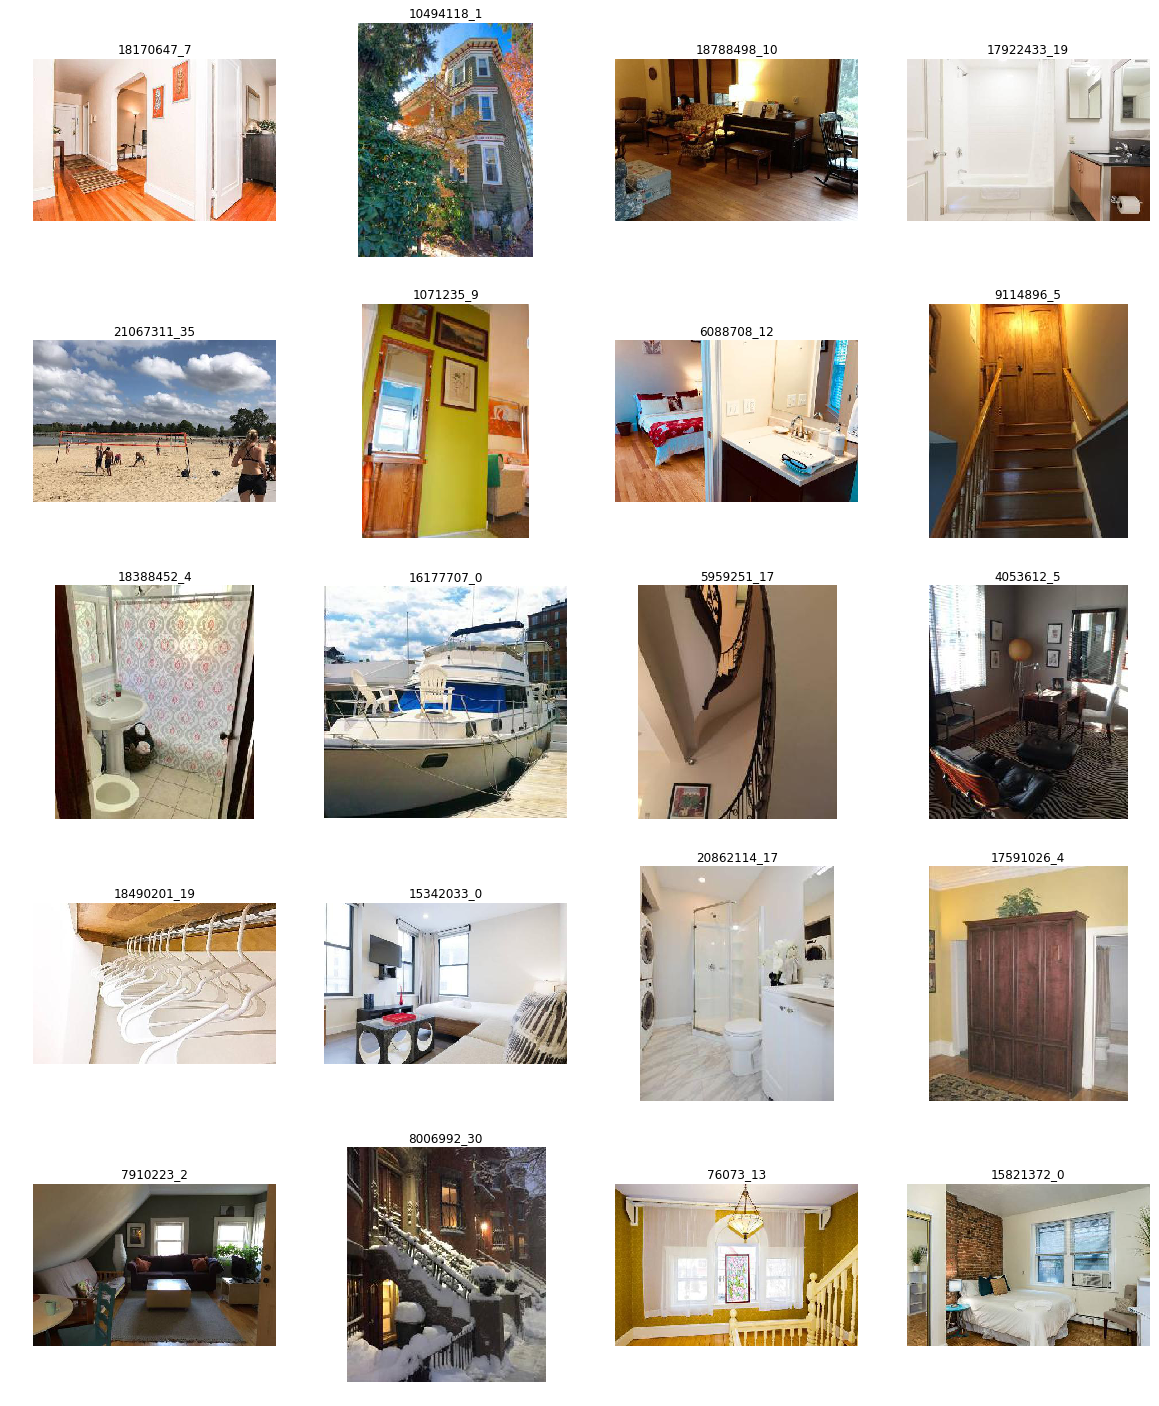

In [112]:
similar_imshow(selected_image)

## Loading in Json file

In [424]:
data_base_json_full = 'https://s3-us-west-2.amazonaws.com/chen-gal-test/AirbnbData/Boston-Massachusetts-US/ws_data/webscrapted.json'
database_json_short = 'AirbnbData/Boston-Massachusetts-US/ws_data/webscrapted.json'
bucket_name = "chen-gal-test"
s3 = boto3.client("s3")

response = s3.get_object(Bucket=bucket_name,
                             Key=database_json_short)
fake_database= json.loads(response['Body'].read())

## Query from the fake database

In [482]:
fake_result = {}
for i in selected_apt:
    
    tmp = {}
    x = fake_database[str(i)]
    tmp['apt_name'] = x['apt_name']
    tmp['canonical_url'] = x['info']['canonical_url']
    tmp['room_type'] = x['info']['room_type']
    tmp['room_compacity'] = x['info']['room_capacity']
    tmp['host_about'] = x['info']['host_about']
    tmp['overall_rating']=x['info']['overall_rating']
    tmp['review_highlight'] = x['info']['review_highlight']
    fake_result[str(i)]=tmp

    

In [489]:

result = json.dumps(fake_result)
jsonified_result = jsonify({'inputs': result})

NameError: name 'app' is not defined

In [484]:
result = jsonify(fake_result)

20

In [475]:
fake_info = fake_database[str(selected_apt[1])]